# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

# Problem statement

Are high salaries for data scientist roles related to the cities where they are available?

Are high salaries for data scientist roles related to some specific words in the job title?

The aim of this project is to answer these questions using data scraped from indeed.com.

In [18]:
# URL to scrape
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

# URL with some salaries
#URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=270"

In [23]:
from __future__ import division, print_function, unicode_literals
import urllib2
import requests
import bs4
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
## Get a soup from the webpage
response = requests.get(URL)
page = response.text
soup = BeautifulSoup(page)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <!-- pll -->
  <script src="/s/2c2181b/en_US.js" type="text/javascript">
  </script>
  <link href="/s/1a7c741/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&amp;l=New+York" rel="alternate" title="Data Scientist $20,000 Jobs, Employment in New York, NY" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+scientist+%2420%2C000&amp;l=New+York" media="handheld" rel="alternate"/>
  <script type="text/javascript">
   window['closureReadyCallbacks'] = [];

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
  </script>
  <script src="/s/3f52f7f/jobsearch-all-compiled.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   var pingUrlsForGA = [];

var

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it
    - Remember to use `try/except` if you anticipate errors
- **Test** the functions on the results above and simple examples

In [21]:
# The location is set in a span with class='location'.
def extract_location_from_result(result):
    loc = result.find("span", class_="location").text
    #print("extract_location_from_result:", loc)
    return loc

# The salary is available in a nobr element inside of a td element with class='snip.
def extract_salary_from_result(result):
#    sal = result.find("nobr", class_="snip")
    try:
        sal = result.nobr.text
    except:
        sal = ""
    #print("extract_salary_from_result:", sal)
    return sal

# The title of a job is in a link with class set to jobtitle and a data-tn-element="jobTitle.
def extract_job_title_from_result(result):
    job = result.h2.a.get("title")
    #print("extract_job_title_from_result:", job)
    return job

# The company is set in a span with class='company'.
def extract_company_from_result(result):
    comp = result.find("span", class_="company").contents[1].text.strip()
    #print("extract_company_from_result:", comp)
    return comp

def process_results(results, location=""):
    processed = []
    for res in results[:]:
        if location == "":
            loc = extract_location_from_result(res)
        else:
            loc = location
        job = extract_job_title_from_result(res)
        comp = extract_company_from_result(res)
        sal = extract_salary_from_result(res)
        processed.append([loc, job, comp, sal])
    return processed
    
def get_results_from_soup(soup):
    return soup.findAll("div", class_=" row result")

print(process_results(get_results_from_soup(soup)))

df = pd.DataFrame(process_results(get_results_from_soup(soup)),
                  columns=["location", "job", "comp", "salary"])
df

[[u'New York, NY 10032 (Washington Heights area)', 'Data Scientist / Spark ML Developer', u'Morgan Stanley', u''], [u'New York, NY', 'Data Analytics Research Scientist', u'POLICE DEPARTMENT', u'$70,286 - $88,213 a year'], [u'New York, NY', 'Health Scientist', u'Centers for Disease Control and Prevention', u'$88,305 - $146,570 a year'], [u'New York, NY', u'Applied Scientist \u2013 Emerging AWS Machine Learning', u'Amazon Corporate LLC', u''], [u'New York, NY 10011 (Chelsea area)', 'Clean Energy Grid Integration Science Fellow', u'Natural Resources Defense Council', u''], [u'New York, NY', 'Data Analyst, Bureau of Mental Health/Research and Evaluation', u'DEPT OF HEALTH/MENTAL HYGIENE', u'$70,286 - $88,213 a year'], [u'New York, NY', 'Analytics', u'Foursquare', u''], [u'New York, NY', 'Research Analyst - All 2017', u'Third Bridge', u''], [u'New York, NY', 'Research Scientist', u'Yahoo! Inc.', u'']]


,location,job,comp,salary
0,"New York, NY 10032 (Washington Heights area)",Data Scientist / Spark ML Developer,Morgan Stanley,
1,"New York, NY",Data Analytics Research Scientist,POLICE DEPARTMENT,"$70,286 - $88,213 a year"
2,"New York, NY",Health Scientist,Centers for Disease Control and Prevention,"$88,305 - $146,570 a year"
3,"New York, NY",Applied Scientist – Emerging AWS Machine Learning,Amazon Corporate LLC,
4,"New York, NY 10011 (Chelsea area)",Clean Energy Grid Integration Science Fellow,Natural Resources Defense Council,
5,"New York, NY","Data Analyst, Bureau of Mental Health/Research...",DEPT OF HEALTH/MENTAL HYGIENE,"$70,286 - $88,213 a year"
6,"New York, NY",Analytics,Foursquare,
7,"New York, NY",Research Analyst - All 2017,Third Bridge,
8,"New York, NY",Research Scientist,Yahoo! Inc.,


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [22]:
# used only cities in the US to avoid currency conversion
YOUR_CITY = 'Charlotte'
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
# Set this to a high-value (5000) to generate more results. 
max_results_per_city = 5#000
# Crawling more results, will also take much longer. 
# First test your code on a small number of results and then expand.

results = []
base_URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l="

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle',
                 'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
                 'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY]):
    print(city)
    for start in range(1, max_results_per_city, 10):
        URL = base_URL+city+"&start="+str(start)
        response = requests.get(URL)
        page = response.text
        soup = BeautifulSoup(page)
        res = process_results(soup.findAll("div", class_=" row result"), location=city)
        results.extend(res)
        

df = pd.DataFrame(results, columns=["location", "job", "comp", "salary"])

df.head()

Houston
Phoenix
Chicago
San+Francisco
New+York
Dallas
Philadelphia
Denver
Los+Angeles
Pittsburgh
Charlotte
Miami
Atlanta
Seattle
Austin
Portland


,location,job,comp,salary
0,Houston,Statistician,UT Health Science Center at Houston,
1,Houston,Quantitative Research Scientist - Options Stra...,Quantlab Financial,
2,Houston,Scientist I,Pros.,
3,Houston,Sr. Analyst – Data Analysis and Business Repor...,Cardtronics,
4,Houston,Scientist,Houston Methodist,


In [23]:
df.shape

(144, 4)

In [24]:
# save data to file, so I don't have to scrape it everytime
df.to_csv("salary_as_scraped.csv", encoding="utf-8")

In [88]:
#load data from file
df = pd.read_csv('salary_as_scraped.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
Unnamed: 0    144 non-null int64
location      144 non-null object
job           144 non-null object
comp          144 non-null object
salary        33 non-null object
dtypes: int64(1), object(4)
memory usage: 5.7+ KB


In [79]:
# Read two dataframes into one dataframe save again in a clean file.
# This is because I did the scraping in two different days.
# Not needed anymore, kept for historical reasons.
# 
#df1 = pd.read_csv('salary_data1.csv')
#print(df1.shape)
#df2 = pd.read_csv('salary_data2.csv')
#print(df2.shape)
#df = pd.concat([df1, df2])
#print(df.shape)
#df.to_csv("salary_data.csv", encoding="utf-8")

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [80]:
# Processed different cities above.
# Saved file to prevent loss of data.
# Read file again, all data in df dataframe.

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [89]:
# Create smaller and cleaner df here: 
# remove extra index column, remove duplicates
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df_no_dups = df.drop_duplicates(keep="first")
df_no_dups_no_na = df_no_dups.dropna()
df_no_dups_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 9 to 140
Data columns (total 4 columns):
location    33 non-null object
job         33 non-null object
comp        33 non-null object
salary      33 non-null object
dtypes: object(4)
memory usage: 1.3+ KB


#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [90]:
# Converts other salaries into yearly salaries.
# Averages ranges
def proc_sal(sal):
    sal = str(sal)
    sal = sal.replace("$","").replace(",","").replace("-"," ")
    value = np.mean([float(s) for s in sal.split() if s.isdecimal()])
    if "year" in sal:
        newsal = value
    elif "month" in sal: 
        newsal = value*12
    elif "week" in sal: 
        newsal = value*52
    elif "day" in sal: 
        newsal = value*(365-125)
    elif "hour" in sal: 
        newsal = value*8*(365-125)
    else:
        newsal = "NA"
    return newsal

df_no_dups_no_na.loc[:,"anual_salary"] = map(proc_sal, df_no_dups_no_na["salary"])
# drop salaries that we were unable to process correctly
df_no_dups_no_na2 = df_no_dups_no_na.dropna()

In [91]:
# create column with city only
df_no_dups_no_na2["city"] = map((lambda x: x.split(",",1)[0]), df_no_dups_no_na2["location"])
df_no_dups_no_na2.head()

,location,job,comp,salary,anual_salary,city
9,Phoenix,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix
10,Phoenix,DATA ANALYSIS AND RESEARCH MANAGER,Arizona Health Care Cost Containment System,"$65,000 - $72,000 a year",68500.0,Phoenix
11,Phoenix,Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
15,Phoenix,Data Statistical Specialist (Job 2105),Arizona Supreme Court,"$56,677 a year",56677.0,Phoenix
23,Chicago,Data Scientist,Workbridge Associates,"$100,000 - $120,000 a year",110000.0,Chicago


### Save your results as a CSV

In [99]:
# save data to file, so I don't have to scrape and clean it everytime
df_no_dups_no_na2.to_csv("salary_relevant_rows.csv", 
                         encoding="utf-8",
                         index=False)

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [163]:
# xxx start loading from here to create models

df = pd.read_csv('salary_relevant_rows.csv')
# we need to dropna because of statsmodels
df.dropna(inplace=True)
print(df.shape)
df.head()

(196, 6)


,location,job,comp,salary,anual_salary,city
0,"Houston, TX",Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,"Houston, TX",Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,"Tempe, AZ",Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,"Phoenix, AZ 85003 (Central City area)",Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [164]:
## calculate median salary
median_salary = np.median(df["anual_salary"])
median_salary

79249.5

In [165]:
df["sal_class"] = map((lambda x: "LOW" if x < median_salary else "HIGH"), df["anual_salary"])
df.head()

,location,job,comp,salary,anual_salary,city,sal_class
0,"Houston, TX",Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston,LOW
1,"Houston, TX",Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston,HIGH
2,"Tempe, AZ",Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe,LOW
3,"Phoenix, AZ 85003 (Central City area)",Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix,LOW
4,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix,LOW


In [166]:
df["sal_class"].value_counts()

HIGH    100
LOW      96
Name: sal_class, dtype: int64

#### Thought experiment: What is the baseline accuracy for this model?

In [167]:
## We don't have a model yet, so I'm not sure what this means.

## The simplest model that I can think of always predicts the most 
## frequent salary class.

## It will have an accuracy of 
low = df["sal_class"].value_counts()["LOW"]
high = df["sal_class"].value_counts()["HIGH"]
print((low if low > high else high) / (low + high))

0.510204081633


#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [168]:
import statsmodels.api as sm

df_features_for_sm_city = pd.get_dummies(df["city"])
df_target_for_sm = df["sal_class"].replace({"HIGH":1, "LOW":0})

sm_model_city = sm.Logit(df_target_for_sm, df_features_for_sm_city)
sm_model_city_result = sm_model_city.fit() 
sm_model_city_result.summary() 

         Current function value: 0.422053
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              sal_class   No. Observations:                  196
Model:                          Logit   Df Residuals:                      151
Method:                           MLE   Df Model:                           44
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                  0.3909
Time:                        17:30:51   Log-Likelihood:                -82.722
converged:                      False   LL-Null:                       -135.82
                                        LLR p-value:                 4.676e-07
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Atlanta              -0.2877      0.764     -0.377      0.706        -1.785     1.209
Aurora              -22.8458   6.46e+04     -0.000      1.000     -1.27e+05  1.27e+05
Austin               -0.8109      0.601     -1.349      0.177        -1.989     0.367
Azusa               -30.0739   3.39e+06  -8.87e-06      1.000     -6.65e+06  6.65e+06
Bellevue                   0      1.414          0      1.000        -2.772     2.772
Belmont              30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
Berkeley            -30.0739   3.39e+06  -8.87e-06      1.000     -6.65e+06  6.65e+06
Boulder             -30.0739   3.39e+06  -8.87e-06      1.000     -6.65e+06  6.65e+06
Burbank              30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
Charlotte            30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
Chatsworth          -30.0739   3.39e+06  -8.87e-06      1.000     -6.65e+06  6.65e+06
Chicago               1.2528      0.567      2.210      0.027         0.142     2.364
Coral Gables         -1.0986      0.816     -1.346      0.178        -2.699     0.502
Culver City          30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
Dallas               23.0493   5.84e+04      0.000      1.000     -1.14e+05  1.15e+05
Dallas-Fort Worth    30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
Denver               -0.6931      1.225     -0.566      0.571        -3.094     1.707
Des Plaines          30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
Evanston            -30.0739   3.39e+06  -8.87e-06      1.000     -6.65e+06  6.65e+06
Fort Washington            0      1.414          0      1.000        -2.772     2.772
Fullerton           -22.8458   6.46e+04     -0.000      1.000     -1.27e+05  1.27e+05
Houston                    0      1.414          0      1.000        -2.772     2.772
Irving               -0.6931      1.225     -0.566      0.571        -3.094     1.707
King of Prussia      30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
Los Angeles           0.7885      0.539      1.462      0.144        -0.269     1.846
Manhattan            -0.5108      0.730     -0.699      0.484        -1.942     0.921
Miami                 0.6931      1.225      0.566      0.571        -1.707     3.094
Miami Lakes          30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
Monroe               30.0739   3.39e+06   8.86e-06      1.000     -6.65e+06  6.65e+06
New York              0.6931      0.387      1.790      0.074        -0.066     1.452
Oakland             -22.8458   6.46e+04     -0.000      1.000     -1.27e+05  1.27e+05
Philadelphia          2.1972      1.054      2.084      0.037         0.131     4.263
Phoenix              -1.9459      1.069     -1.820      0.069        -4.041     0.149
Pittsburgh          -22.8458   6.46e+04     -0.000      1.000     -1.27e+05  1.27e+05
Plano                30.0739   3.39e+06   8.86e-06      1.0

In [169]:
len(df["city"].unique())

45

There are 45 different cities for 200 data points (rows with salaries).  This is probably the reason why the model did not converge.  The best way to solve this problem would be to scrape for more salary data, if we had the time for that.  A different approach would consider state instead of city, but there are still 50 different states, so the best would be to get more salary data.

Interpreting the coefficients is hard, for the reason explained above.  Negative coefficients are associated with cities that are less likely to have HIGH salaries, and positive coeficients are associated with cities that are more likely to have HIGH salaries.

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [170]:
df["analyst"] = map(int, df["job"].str.lower().str.contains("analy"))
df["research"] = map(int, df["job"].str.lower().str.contains("research"))
df["specialist"] = map(int, df["job"].str.lower().str.contains("special"))
df["senior"] = map(int, (df["job"].str.lower().str.contains("senior") |
                         df["job"].str.lower().str.contains("snr") |
                         df["job"].str.lower().str.contains("sr.")))
df["manager"] = map(int, df["job"].str.lower().str.contains("manager"))

job_title_feature_names = ["analyst", "research", "specialist", "senior", "manager"]
for feature in job_title_feature_names:
    print(feature, df[feature].sum())

df.head()

analyst 77
research 63
specialist 11
senior 34
manager 8


,location,job,comp,salary,anual_salary,city,sal_class,analyst,research,specialist,senior,manager
0,"Houston, TX",Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston,LOW,1,1,0,0,0
1,"Houston, TX",Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston,HIGH,0,0,0,1,0
2,"Tempe, AZ",Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe,LOW,1,0,1,0,0
3,"Phoenix, AZ 85003 (Central City area)",Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix,LOW,1,1,0,0,0
4,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix,LOW,1,1,0,0,0


In [171]:
df_features_for_sm_job_titles = df[job_title_feature_names]
df_target_for_sm = df["sal_class"].replace({"HIGH":1, "LOW":0})

print(df_features_for_sm_job_titles.shape)
print(df_features_for_sm_job_titles.head())
print(df_target_for_sm.shape)
print(df_target_for_sm.head())

(196, 5)
   analyst  research  specialist  senior  manager
0        1         1           0       0        0
1        0         0           0       1        0
2        1         0           1       0        0
3        1         1           0       0        0
4        1         1           0       0        0
(196,)
0    0
1    1
2    0
3    0
4    0
Name: sal_class, dtype: int64


In [172]:
sm_model_job_titles = sm.Logit(df_target_for_sm, df_features_for_sm_job_titles)
sm_model_job_titles_result = sm_model_job_titles.fit() 
sm_model_job_titles_result.summary()

Optimization terminated successfully.
         Current function value: 0.641014
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              sal_class   No. Observations:                  196
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            4
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                 0.07493
Time:                        17:30:52   Log-Likelihood:                -125.64
converged:                       True   LL-Null:                       -135.82
                                        LLR p-value:                 0.0004250
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
analyst       -0.1397      0.317     -0.440      0.660        -0.762     0.482
research      -0.6148      0.356     -1.729      0.084        -1.312     0.082
specialist    -2.0734      1.056     -1.964      0.049        -4.142    -0.005
senior         0.8801      0.377      2.334      0.020         0.141     1.619
manager        0.5163      0.745      0.693      0.488        -0.944     1.976
==============================================================================
"""

Looking at the coefficients we can see that senior roles are more associated with high salaries than manager roles.  We can also see that specialist roles are negatively associated with high salaries.

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [173]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

In [174]:
# define X features and y target variables

X = df[job_title_feature_names]
y = df["sal_class"].replace({"HIGH":1, "LOW":0})

print(X.shape)
print(X.head())
print(y.shape)
print(y.head())

(196, 5)
   analyst  research  specialist  senior  manager
0        1         1           0       0        0
1        0         0           0       1        0
2        1         0           1       0        0
3        1         1           0       0        0
4        1         1           0       0        0
(196,)
0    0
1    1
2    0
3    0
4    0
Name: sal_class, dtype: int64


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score

In [176]:
logreg_ridge_linear = LogisticRegression()
# same as 
# logreg_ridge_linear = LogisticRegression(penalty="l2", solver="liblinear")
logreg_ridge_linear.fit(X, y)
examine_coefficients(logreg_ridge_linear, X)

,Coefficient,Feature
2,-1.355220,specialist
1,-0.738345,research
0,-0.413262,analyst
4,0.129406,manager
3,0.519567,senior


As expected, using sklearn having "senior" in the job title is more correlated to a high salary than "manager", just like when using statsmodels.  Using "specialist" in the job title continues to be negatively correlated with a high salary.

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [177]:
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(logreg_ridge_linear, X, y, cv=10, scoring=metric)
    print('mean', metric, ':', scores.mean(), '\nall scores :', scores, "\n")

mean accuracy : 0.617368421053 
all scores : [ 0.8         0.5         0.65        0.45        0.65        0.65
  0.84210526  0.52631579  0.47368421  0.63157895] 

mean precision : 0.623248695749 
all scores : [ 0.875       0.5         0.6         0.46666667  0.63636364  0.71428571
  0.76923077  0.55555556  0.5         0.61538462] 

mean recall : 0.72 
all scores : [ 0.7  0.8  0.9  0.7  0.7  0.5  1.   0.5  0.6  0.8] 

mean roc_auc : 0.646444444444 
all scores : [ 0.8         0.48        0.745       0.46        0.745       0.64
  0.90555556  0.52777778  0.43888889  0.72222222] 



Using these features improves accuracy from the base model, so we can conclude that they are useful for predicting if the salary for a position will be under or above the median.

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [178]:
# The logreg_ridge_linear model built above is using L2 regularization.

logreg_lasso = LogisticRegression(penalty="l1")
logreg_lasso.fit(X, y)
examine_coefficients(logreg_lasso, X)

,Coefficient,Feature
2,-1.567679,specialist
1,-0.732410,research
0,-0.353926,analyst
3,0.454142,senior


Lasso regression will select only the most relevant features.  We can see that there is no corfficient for manager in the job title.  This may be because it is not relevant, or because this word appears in only a few rows from our dataframe.  (We checked the numbers after creating these features.)

In [179]:
# Using a different solver for L2 regularization.

logreg_ridge_newton = LogisticRegression(penalty="l2", solver="newton-cg")
logreg_ridge_newton.fit(X, y)
examine_coefficients(logreg_ridge_newton, X)

,Coefficient,Feature
2,-1.364142,specialist
1,-0.746578,research
0,-0.424868,analyst
4,0.119642,manager
3,0.507755,senior


Using a different solver produces different values for the coefficients, but their ordering is the same.  This needs to be compared to logreg_ridge_linear, if we want to compare the coefficients for all the features.

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

Already did this above.  One interesting improvement to what I did would be to automatically select the most common words from the job titles and use them all as features with lasso regression.

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

Done above.

# Summary

The first part of this project turned out to be the one that took the greatest amount of time.     Even web pages that are supposedly easy to scrape turn out to be a challenge, with the additional caveat that they can change over time.

One of the lessons learned is that it's important to save the scraped data regularly, if we are to be able to reproduce our results.

After having the data, I realised that many rows were repeated and very few rows contained salary information (around 200 out of 56000).  Because of time constraints, I decided to continue with the project, instead of risking not being able to submit it in time.  This is the reason why my dataset is relatively small.

Creating the regression models was relatively simple, but I'm not sure if I did what was expected or if I misinterpreted the results.

Given the small size of the dataset, the models' predictions are not very accurate.  Maybe using more words from the title and then Lasso regression would produce better results.  This is something to experiment with in the future.

The main take away is that for data scientists, senior roles are more likely to have a high salary than other roles, including manager roles.  This is to be expected, as experience tends to be highly valued in the job market.

This can be easily verified in the folowing plot.

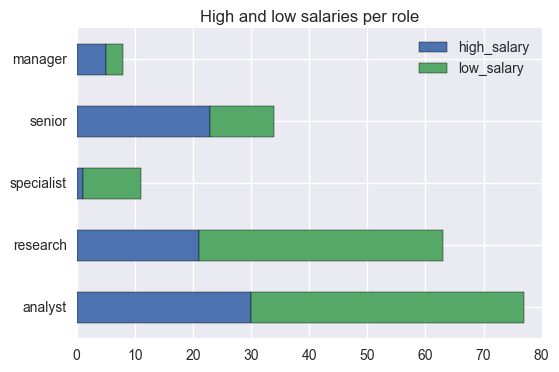

In [205]:
job_counts = []
for feature in job_title_feature_names:
    have_feature = df[df[feature] == 1]
    count_high = have_feature["sal_class"].value_counts()["HIGH"]
    count_low = have_feature["sal_class"].value_counts()["LOW"]
    job_counts.append([count_high, count_low])

df_plot = pd.DataFrame(job_counts, 
                       columns=["high_salary", "low_salary"],
                          index=job_title_feature_names)

df_plot.plot.barh(stacked=True, title="High and low salaries per role")

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [180]:
## YOUR CODE HERE

In [181]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [182]:
## YOUR CODE HERE

## Blog post here:

https://acardocacho.github.io/project04/